

Your task is to beat all benchmarks in this competition. Here you won’t be provided with detailed instructions. Hopefully, at this stage of the course, it's enough for you to take a quick look at the data in order to understand that this is the type of task where gradient boosting will do. Most likely it will be LightGBM. But you can try Xgboost or Catboost as well.

<img src="https://habrastorage.org/webt/fs/42/ms/fs42ms0r7qsoj-da4x7yfntwrbq.jpeg" width=30% />

In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer


In [6]:
train_df = pd.read_csv('flight_delays_train.csv')
test_df = pd.read_csv('flight_delays_test.csv')

In [7]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [8]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [9]:
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

In [9]:
train_df['flight']=train_df['Origin']+'-'+train_df['Dest']
test_df['flight']=test_df['Origin']+'-'+test_df['Dest']

In [10]:
train_df = train_df.drop(columns=['Origin','Dest'])
test_df = test_df.drop(columns=['Origin','Dest'])

In [11]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Distance,dep_delayed_15min,flight
0,c-8,c-21,c-7,1934,AA,732,0,ATL-DFW
1,c-4,c-20,c-3,1548,US,834,0,PIT-MCO
2,c-9,c-2,c-5,1422,XE,416,0,RDU-CLE
3,c-11,c-25,c-6,1015,OO,872,0,DEN-MEM
4,c-10,c-7,c-6,1828,WN,423,1,MDW-OMA


Given flight departure time, carrier's code, departure airport, destination location, and flight distance, you have to predict departure delay for more than 15 minutes. As the simplest benchmark, let's take logistic regression and two features that are easiest to take: DepTime and Distance. This will correspond to **"simple logit baseline"** on Public LB.

In [12]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Distance,flight
0,c-7,c-25,c-3,615,YV,598,MRY-PHX
1,c-4,c-17,c-2,739,WN,1235,LAS-HOU
2,c-12,c-2,c-7,651,MQ,577,GSP-ORD
3,c-3,c-25,c-7,1614,WN,377,BWI-MHT
4,c-6,c-6,c-3,1505,UA,258,ORD-STL


In [13]:
labelenc = LabelEncoder()
train_df = train_df.apply(labelenc.fit_transform)
test_df = test_df.apply(labelenc.fit_transform)

In [14]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Distance,dep_delayed_15min,flight
0,10,13,6,1017,0,577,0,152
1,6,12,2,791,18,651,0,3527
2,11,11,4,705,20,306,0,3619
3,2,17,5,458,15,683,0,1181
4,1,28,5,951,19,313,1,2681


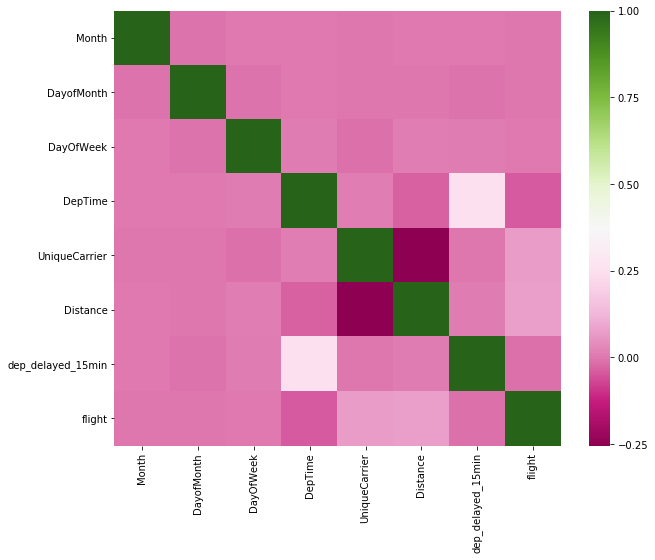

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), cmap="PiYG");

## Earlier Results
 
Best Score of 0.71054, roc_auc=0.716 [xgb with 7 features]

Score of 0.70960 , [xgb with 5 features]
 
Score of 0.69855, when roc_auc is 0.7010784230341742 [xgb with 3 features flight, deptime and distance]

In [337]:
train = pd.read_csv('flight_delays_train.csv')
test = pd.read_csv('flight_delays_test.csv')

In [338]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [339]:
test['UniqueCarrier'].nunique()

20

In [340]:
train['Origin'].nunique()

289

In [341]:
train['Dest'].nunique()

289

In [342]:
train['UniqueCarrier'].value_counts()

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64

In [343]:
test['UniqueCarrier'].value_counts()

WN    15876
AA     8606
OO     7953
MQ     6981
US     6587
DL     6496
UA     6435
XE     5836
NW     5602
CO     4367
YV     3901
EV     3770
FL     3500
9E     3461
OH     3103
B6     2651
AS     2134
F9     1390
HA      722
AQ      629
Name: UniqueCarrier, dtype: int64

In [344]:
test['UniqueCarrier'].nunique()

20

In [345]:
# we will take only top 10 airports and 20 origin/dest cities
# next 30 origin/dest cities
# now all 22 carriers, issue since test data has only 20 carries, so let us change to 20
# this also is a problem since the top 20 do not match. let us build a combined list to fix this problem

n = 30
origin_train = train.Origin.value_counts().head(n).index.tolist()
origin_test = test.Origin.value_counts().head(n).index.tolist()
origin_list = origin_train + origin_test
odf = pd.DataFrame(origin_list)
odf = odf.drop_duplicates()
origin_list = odf[0].head(n).tolist()

dest_train = train.Dest.value_counts().head(n).index.tolist()
dest_test = test.Dest.value_counts().head(n).index.tolist()
dest_list = dest_train + dest_test
ddf = pd.DataFrame(dest_list)
ddf = ddf.drop_duplicates()
dest_list = ddf[0].head(n).tolist()


In [346]:
# The cities list is working since there are 289 cities and top 30 seem to be there in both
# UniqueCarrier not equal in train and test, so we have deal differently
print(train['UniqueCarrier'].nunique())
print(test['UniqueCarrier'].nunique())
train_uq = train['UniqueCarrier'].drop_duplicates()
test_uq = test['UniqueCarrier'].drop_duplicates()
carriers_list = []
for x in train_uq:
    if x in test_uq.values: 
        carriers_list.append( x )

22
20


In [347]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [348]:
train['DayOfWeek'] = train.DayOfWeek.apply(lambda x: int(x.split('-')[1]))
train['Month'] = train.Month.apply(lambda x: int(x.split('-')[1]))
train['DayofMonth'] = train.DayofMonth.apply(lambda x: int(x.split('-')[1]))

# make delay numeric
train['dep_delayed_15min'] = train.dep_delayed_15min.apply(lambda x: 1 if x == 'Y' else 0)

#origin_list = train.Origin.value_counts().head(30).index.tolist()
train['Origin'] = train.Origin.apply(lambda x: x if x in origin_list else 'other')

#dest_list = train.Dest.value_counts().head(30).index.tolist()
train['Dest'] = train.Dest.apply(lambda x: x if x in dest_list else 'other')

#we are taking carriers from test coz it has lesser airlines than train
#carriers_list = test.UniqueCarrier.value_counts().head(12).index.tolist()
train['UniqueCarrier'] = train.UniqueCarrier.apply(lambda x: x if x in carriers_list else 'other')


In [292]:
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,other,MCO,834,0
2,9,2,5,1422,XE,other,CLE,416,0
3,11,25,6,1015,OO,DEN,other,872,0
4,10,7,6,1828,WN,MDW,other,423,1


In [349]:
X_train = pd.get_dummies(train)

In [350]:
X_train.shape

(100000, 88)

In [351]:
X_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_ORD,Dest_PHL,Dest_PHX,Dest_SAN,Dest_SEA,Dest_SFO,Dest_SJC,Dest_SLC,Dest_TPA,Dest_other
0,8,21,7,1934,732,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,834,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,2,5,1422,416,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,25,6,1015,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10,7,6,1828,423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


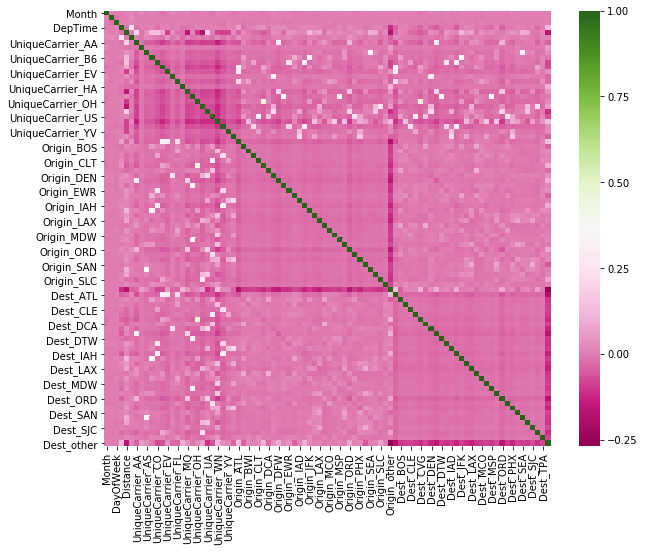

In [352]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="PiYG");

In [353]:
y_train = X_train['dep_delayed_15min'] 
X_train = X_train.drop(columns=['dep_delayed_15min'])

In [354]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.2, random_state=17)

In [355]:
y_train_part.value_counts()

0    64745
1    15255
Name: dep_delayed_15min, dtype: int64

In [357]:
test['DayOfWeek'] = test.DayOfWeek.apply(lambda x: int(x.split('-')[1]))
test['Month'] = test.Month.apply(lambda x: int(x.split('-')[1]))
test['DayofMonth'] = test.DayofMonth.apply(lambda x: int(x.split('-')[1]))

test['Origin'] = test.Origin.apply(lambda x: x if x in origin_list else 'other')
test['Dest'] = test.Dest.apply(lambda x: x if x in dest_list else 'other')
test['UniqueCarrier'] = test.UniqueCarrier.apply(lambda x: x if x in carriers_list else 'other')

test = pd.get_dummies(test)

In [358]:
X_train.shape

(100000, 87)

In [359]:
X_test = test

In [360]:
X_test.shape

(100000, 87)

### Starting  with Light GBM as it is recommended by many. Also because we have get_dummied, we cannot provide a list of categorical features to CatBoost. Light GBM being faster than XGBoost, tried this with some tuned parameters.

In [332]:
lgbm5 = LGBMClassifier(random_state=17, n_estimators=1000, colsample_bytree=0.66,
                       max_depth=-1, num_leaves=5, reg_alpha=1.2, subsample=0.75,
                       reg_lambda=1, learning_rate=0.5)
lgbm5.fit(X_train_part, y_train_part)
lgbm_valid_pred = lgbm5.predict_proba(X_valid)[:, 1]

print(roc_auc_score(y_valid, lgbm_valid_pred))

0.7457694719636444


In [373]:
lgbm5.fit(X_train, y_train)
test_pred = lgbm5.predict_proba(X_test)[:, 1]

pd.Series(test_pred, 
          name='dep_delayed_15min').to_csv('lgbm_53.csv', 
                                           index_label='id', header=True)

Started with top 10 carriers and origin/dest, then increased origin/dest cities. Then also fine tuned carrier to maximize inclusion in training and test sets. And the scores show improvement with incorporation of more features.
 
20 cities: roc_auc 0.7411809497146848, score 
 
30 cities: roc_auc 0.7448042710182534, SCORE: 0.72605

improved carrier to 12: roc_auc 0.7466624936695624

carrier count 20: roc_auc 0.7457694719636444, SCORE: 0.72732
 

My best scores when I just LabelEncoded the features was with XGB. So wanted to see how XGB would fare with the get_dummied features. Was willing to wait even if it took time. The numbers did not disappoint!

In [356]:
xgb = XGBClassifier(seed=17)
xgb.fit(X_train_part, y_train_part)
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, xgb_valid_pred)

0.7222339929654586

In [361]:
parameters = {'num_leaves': [7, 15, 31, 63, 127, 255],
              'max_depth': [3, 4, 5, 6]}

In [362]:
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, 
                           verbose=1, scoring='roc_auc',
                           n_jobs=4, cv=5)
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 20.7min finished


In [363]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 6, 'num_leaves': 7}, 0.7435688429686391)

In [364]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_leaves=7, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=17, silent=True, subsample=1)

In [365]:
xgb2 = XGBClassifier(seed=17,max_depth=6, num_leaves=7)
xgb2.fit(X_train_part, y_train_part)
xgb_valid_pred = xgb2.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, xgb_valid_pred)

0.7399399421839978

In [367]:
xgb2.fit(X_train, y_train)
test_pred = xgb2.predict_proba(X_test)[:, 1]

pd.Series(test_pred, 
          name='dep_delayed_15min').to_csv('xgb_2.csv', 
                                           index_label='id', header=True)

## Results so far
 
Basic xgb: roc_auc = 0.7261138465464236, score = 0.71015 (earlier results)

xgb2: roc_auc = 0.7405958348698618, score = 0.70654 (earlier results)
 
new dataset features: xgb2: roc_auc = 0.7399399421839978

## Stacking Scores
 
0.4 * xgb_1 0.71015 0.6 * cb_5000 0.69020, stack SCORE - 0.70229
 
0.6 * xgb_1 0.4* lgbm_4, stack SCORE - 0.71215
 
0.8 * xgb_1 0.2 * lgbm_4, stack SCORE - 0.71186

With the new way of feature engineering, I was already improving on my scores since submission time (midnight 12/16/2018). I then remembered stacking and wanted to try the combination of XGB with LightGBM for my new features. Intuition said that my Light GBM model was better than XGB. So weighted them 0.6 and 0.4 respectively. VIOLA! I crossed the baseline of 0.73449 with this combo. 

## My score is 0.73470  (reached at 6.30 PM IST 12/17/2018) - 50th submission!

In [368]:
p1 = pd.read_csv('xgb_2.csv')
p2 = pd.read_csv('lgbm_53.csv')

In [369]:
p1.columns

Index(['id', 'dep_delayed_15min'], dtype='object')

In [370]:
p3 = 0.4*p1['dep_delayed_15min'] + 0.6*p2['dep_delayed_15min']

In [371]:
p3.tail()

99995    0.040648
99996    0.175293
99997    0.198342
99998    0.117661
99999    0.092322
Name: dep_delayed_15min, dtype: float64

In [372]:
pd.Series(p3, 
          name='dep_delayed_15min').to_csv('p3_4.csv', 
                                           index_label='id', header=True)

Now you have to beat **"A10 benchmark"** on Public LB. It's not challenging at all. Go for LightGBM, maybe some other models (or ensembling) as well. Include categorical features, do some simple feature engineering as well. Good luck!

If you think this course is worth spreading, you can do a favour:
* upvote this [announcement](https://www.kaggle.com/general/68205) on Kaggle Forum; optionally, tell your story threin
* upvote the mlcourse.ai [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse), it'll pull the Dataset up in the list of all datasets
* upvoting course [Kernels](https://www.kaggle.com/kashnitsky/mlcourse/kernels?sortBy=voteCount&group=everyone&pageSize=20&datasetId=32132) is also a nice thing to do 
* spread a word on [mlcourse.ai](https://mlcourse.ai) in social networks, the next session is planned to launch in February 2019